In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav 

# audio.py
import audio

file_name = "../resources/ah_16k.wav"
ah = audio.Audio(*wav.read(file_name)).high_path_filtered()

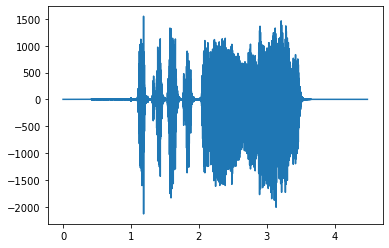

In [3]:
ah.plot()

## 音声の短時間フーリエ変換

一般的に音声の音素は30msくらい。音素の音響的な特徴は前後の音素にも左右されるので10msぐらいにとると特徴を取得できそう。(切り取ったものをフレームと呼ぶ。その長さをフレーム長と呼ぶ。)

で、それぞれでフーリエ変換を行う。

矩形窓でフレーム長10msとっても両端が不連続な関数だとフーリエ変換は高周波に雑音が残るので、両端が減衰する窓関数を使う。ここではハミング窓を使う。

ハミング窓のフレーム長は20msから80ms程度が一般的に使われる。切り取る際は、10msずらしながら切り取っていく。各フレームは両端部分が近隣のフレームとある程度共有している。

In [4]:
# フレーム長
frame_length = list(audio.frame_candidates(ah.rate, 20, 80))[-1]

# ハミング窓
hamming = np.hamming(frame_length)

# 周波数軸
freqs = np.fft.rfftfreq(frame_length, d=1/ah.rate)

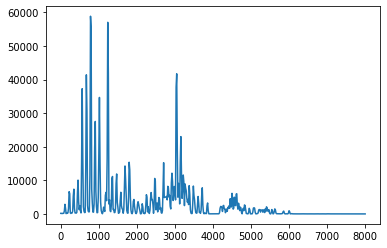

In [5]:
fted_frames = np.array([np.abs(frame)
                        for frame
                        in audio.stft(ah, hamming, 10)])

# 真ん中のやつ見てみる。
mid = fted_frames[len(fted_frames)//2]
plt.plot(freqs, mid)